In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

%autosave 100

Autosaving every 100 seconds


<font color='red'>Assignment 1.1:</font> Load "svm_data.csv" into a DataFrame df.

In [29]:
import pandas as pd
df = pd.read_csv('svm_data.csv')

In [30]:
df.head()

,x,y,label
0,0.071255,-0.196588,0
1,-1.028290,0.362087,0
2,1.264656,0.286208,0
3,-0.958468,1.781923,0
4,-1.736951,1.174945,0


In [31]:
import numpy as np

In [32]:
df.columns

Index(['x', 'y', 'label'], dtype='object')

<font color='red'>Assignment 1.2:</font> Import **SVC** from sklearn, create a pipeline with **StandardScaler**, and train a SVM classifier using **Linear Kernel** to predict labels with **x** and **y**. Do not split train/test data this time.

In [33]:
from sklearn.svm import SVC

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])

In [39]:
X = df[['x','y']]
y = df['label']

In [40]:
 model=svm_pipeline.fit(X, y)

<font color='red'>Assignment 1.3:</font> Find out the **support vectors** and plot them together with data points.

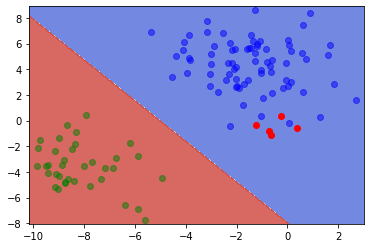

In [37]:
### sample code for plotting decision boundaries ###

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# create a grid
x_min, x_max = df.iloc[:, 0].min() - 0.3, df.iloc[:, 0].max() + 0.3
y_min, y_max = df.iloc[:, 1].min() - 0.3, df.iloc[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# get model predictions for all points on the grid
Z = model_pipeline.predict(np.c_[xx.ravel(), yy.ravel()])

# plot decision regions and boundaries
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# plot original data points
plt.scatter(df[df.label == 0].x, df[df.label == 0].y, marker = 'o', color = 'blue', 
            alpha = 0.5, label = 'label = 0')
plt.scatter(df[df.label == 1].x, df[df.label == 1].y, marker = 'o', color = 'green', 
            alpha = 0.5, label = 'label = 1')

########### add your code here to plot support vectors ##############
support_vectors = svm_pipeline[1].support_vectors_
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')


<font color='red'>Question 1.1:</font> What are support vectors?

The objective of the **support vector machine** algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.
Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.
**Support vectors** are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

<font color='red'>Question 1.2:</font> How many support vectors are there in this model? Where are they located?

In [38]:
len(support_vectors)

5

There are 5 support vectors. In above graph, the red dots are support vectors. They are located in the class of label 0.

<font color='red'>Bonus Assignment 1.4:</font> What is the default **C**? Change hyper parameter **C** and find out how the number and locations of support vectors are affected.

C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
Essentially you are controlling the trade-off between two objectives:

1.Maximise the distance between the decision boundary and support vectors
2.Maximise the number of points that are correctly classified by the decision boundary
This trade-off is usually controlled by a hyperparameter that can be denoted by λ, or, more commonly(in scikit-learn) the C parameter. 
A small values of C leads to a wider street but more margin violations(higher bias, lower variance)
A large values of C leads to a narrower street but with less margin violations(low bias, high variance).

<font color='red'>Bonus Question 1.3:</font> When **C** is relatively small (e.g. 0.01), how many support vectors in positive and negative classes, respectively? Do you see any problem with that?

<font color='red'>Bonus Assignment 1.5:</font> Balance the classes (using **class_weight**), re-train the model, and find the change of support vector numbers in positive and negative classes.

In [41]:
model_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear',class_weight = 'balanced'))
model_pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', kernel='linear'))])

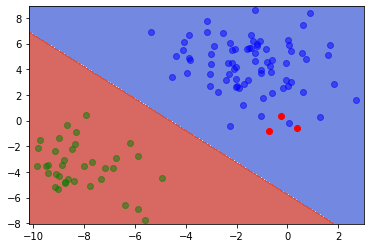

In [42]:
### sample code for plotting decision boundaries ###

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# create a grid
x_min, x_max = df.iloc[:, 0].min() - 0.3, df.iloc[:, 0].max() + 0.3
y_min, y_max = df.iloc[:, 1].min() - 0.3, df.iloc[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# get model predictions for all points on the grid
Z = model_pipeline.predict(np.c_[xx.ravel(), yy.ravel()])

# plot decision regions and boundaries
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# plot original data points
plt.scatter(df[df.label == 0].x, df[df.label == 0].y, marker = 'o', color = 'blue', 
            alpha = 0.5, label = 'label = 0')
plt.scatter(df[df.label == 1].x, df[df.label == 1].y, marker = 'o', color = 'green', 
            alpha = 0.5, label = 'label = 1')

########### add your code here to plot support vectors ##############
support_vectors = model_pipeline[1].support_vectors_
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')


When Class weight is set to balanced and for default C, we  get three support vectors in class of label 0 .

<font color='red'>Question 1.4:</font> What is a hyperplane? What is the optimal hyperplane for a SVM model?

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

The best hyperplane is that plane that has the maximum distance from both the classes, and this is the main aim of SVM. This is done by finding different hyperplanes which classify the labels in the best way then it will choose the one which is farthest from the data points or the one which has a maximum margin.

<font color='red'>Question 1.5:</font> What is the difference between hard margin and soft margin? Which margin was adopted in the above model?

The difference between a hard margin and a soft margin in SVMs lies in the separability of the data. If our data is linearly separable, we go for a hard margin. However, if this is not the case, it won’t be feasible to do that. In the presence of the data points that make it impossible to find a linear classifier, we would have to be more lenient and let some of the data points be misclassified. In this case, a soft margin SVM is appropriate.

Sometimes, the data is linearly separable, but the margin is so small that the model becomes prone to overfitting or being too sensitive to outliers. Also, in this case, we can opt for a larger margin by using soft margin SVM in order to help the model generalize better.

Hard margin does not allow any misclassification whereas soft margin does. The misclassified points receive penalty in cost function

<font color='red'>Question 1.6:</font> What is hinge loss?

Hinge loss is a loss function used in Support Vector Machines (SVM) for binary classification problems. It is a convex function that measures the loss incurred by the SVM model for misclassifying a sample.

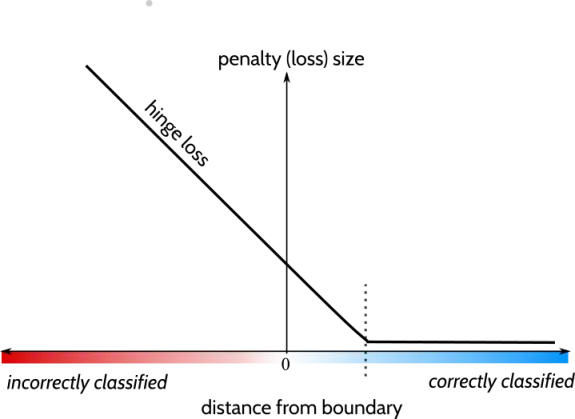
The x-axis represents the distance from the boundary of any single instance, and the y-axis represents the loss size, or penalty, that the function will incur depending on its distance.

The hinge loss function is defined as:

L(y, f(x)) = max(0, 1 - y*f(x))

where y is the true class label (-1 or +1) and f(x) is the predicted score for that sample.

The score is calculated as the dot product between the input features and the learned weights plus a bias term. If the predicted score is greater than or equal to one (yf(x) >= 1), the loss is zero, indicating that the sample is correctly classified. If the predicted score is less than one (yf(x) < 1), the loss is proportional to the distance from the margin (the hyperplane that separates the two classes).

The hinge loss function is used to train the SVM model by minimizing the sum of the loss over all training samples plus a regularization term that penalizes large weights. The regularization term helps to avoid overfitting and encourages the SVM model to find a simpler decision boundary.

One advantage of the hinge loss function is that it encourages the SVM model to focus on the samples that are close to the decision boundary or hard to classify. This is because the loss function is non-zero only for those samples that are misclassified or lie inside the margin.

<font color='red'>Question 1.7:</font> What is the difference between SVM and Logistic Regression? What are the pros and cons of these two algorithm?

Both the algorithms try to find the best hyperplane, but the main difference is logistic regression is a probabilistic approach whereas support vector machine is based on statistical approaches.


SVM tries to finds the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data, while logistic regression does not, instead it can have different decision boundaries with different weights that are near the optimal point.

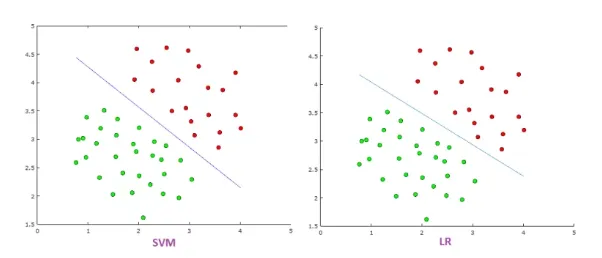

SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables.
SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches.
The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting.

### SVM
Pros:
1. Performs well in Higher dimension. 
2. Best algorithm when classes are separable.
3. Outliers have less impact.
4. SVM is suited for extreme case binary classification.

Cons:
1. Slow: For larger dataset, it requires a large amount of time to process.
2. Poor performance with Overlapped classes : Does not perform well in case of overlapped classes.
3. Selecting appropriate hyperparameters is important: That will allow for sufficient generalization performance.
4. Selecting the appropriate kernel function can be tricky.

### Logistic Regression
Pros
1. Simple to implement
2. Effective
3. Feature scaling not needed: Does not require input features to be scaled (can work with scaled features too, but doesn’t require scaling)
4. Tuning of hyperparameters not needed.

Cons

1. Poor performance on non-linear data(image data for e.g)
2. Poor performance with irrelevant and highly correlated features (use Boruta plot for removing similar or correlated features and irrelevant features).
3. Not very powerful algorithm and can be easily outperformed by other algorithms.
4. High reliance on proper presentation of data. All the important variables / features should be identified for it to work well.

<font color='red'>Question 1.8:</font> Given a data set with many columns and a relatively small amount of rows, which algorithm could be better? SVM or Logistic Regression? Why?

Depending on the number of training sets (data)/features that you have, you can choose to use either logistic regression or support vector machine.

Lets take these as an example where : n = number of features, m = number of training examples

If n is large (1–10,000) and m is small (10–1000) : use logistic regression or SVM with a linear kernel.

If n is small (1–10 00) and m is intermediate (10–10,000) : use SVM with (Gaussian, polynomial etc) kernel

If n is small (1–10 00), m is large (50,000–1,000,000+): first, manually add more features and then use logistic regression or SVM with a linear kernel

Generally, it is usually advisable to first try to use logistic regression to see how the model does, if it fails then you can try using SVM without a kernel (is otherwise known as SVM with a linear kernel). Logistic regression and SVM with a linear kernel have similar performance but depending on your features, one may be more efficient than the other.

<font color='red'>Assignment 1.6:</font> Try **rbf** kernel on the above data.

In [46]:
model_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf',class_weight = 'balanced'))
model_pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced'))])

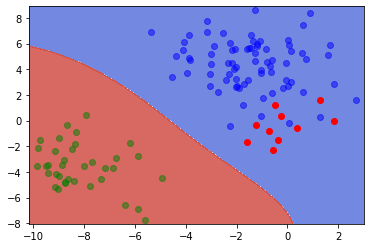

In [47]:
### sample code for plotting decision boundaries ###

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# create a grid
x_min, x_max = df.iloc[:, 0].min() - 0.3, df.iloc[:, 0].max() + 0.3
y_min, y_max = df.iloc[:, 1].min() - 0.3, df.iloc[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# get model predictions for all points on the grid
Z = model_pipeline.predict(np.c_[xx.ravel(), yy.ravel()])

# plot decision regions and boundaries
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# plot original data points
plt.scatter(df[df.label == 0].x, df[df.label == 0].y, marker = 'o', color = 'blue', 
            alpha = 0.5, label = 'label = 0')
plt.scatter(df[df.label == 1].x, df[df.label == 1].y, marker = 'o', color = 'green', 
            alpha = 0.5, label = 'label = 1')

########### add your code here to plot support vectors ##############
support_vectors = model_pipeline[1].support_vectors_
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')


<font color='red'>Question 1.9:</font> How does "kernel trick" work? What is rbf kernel? Where are the support vectors located?

When data cannot be separated by a straight line, it is transformed  into a higher-dimensional space where a straight line can be used to separate the data. This technique works by using a kernel function to measure the similarity between two points in the input space. The kernel function returns a scalar value that is used to compute the dot product of the transformed feature vectors, without actually computing the transformation. This is called kernel trick

We just map the data into a higher-dimensional space, without actually computing the coordinates of the data in that space. This allows us to use linear algorithms like support vector machines (SVMs) to solve non-linear problems in the input space.

The most commonly used kernel functions are the linear kernel, polynomial kernel, and radial basis function (RBF) kernel.
The RBF kernel works by mapping the data into a high-dimensional space by finding the dot products and squares of all the features in the dataset and then performing the classification using the basic idea of Linear SVM. For projecting the data into a higher dimensional space, the RBF kernel uses the so-called radial basis function . The equation is really simple here, the Squared Euclidean Distance is multiplied by the gamma parameter and then finding the exponent of the whole. This equation can find the transformed inner products for mapping the data into higher dimensions directly without actually transforming the entire dataset which leads to inefficiency. And this is why it is known as the RBF kernel function.

The support vectors are in the class of Label 0. However the hyperplane is little curved now, previously it was a straight line.
